<a href="https://colab.research.google.com/github/MOKUAGU/Codes/blob/main/Copy_of_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: Munachi Okuagu**


Prepare the data

In [ ]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167DATASETS/winequality-white.csv')

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [ ]:
import math
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    # OUTPUT: 
    #   the mean absolute error between the actual and predicted values
    total = 0
    for i in range(len(actual)):
      total += (actual.iloc[i] - predicted.iloc[i])**2 #does this have to be squared the MSE equation? 
    return total/len(actual)

# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [ ]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167DATASETS/winequality-white.csv')


shuffled_data = wine_data.sample(frac=1, random_state=41)
test_data = shuffled_data.iloc[0:319]
train_data = shuffled_data [319:]
#319 or 320? 

print("testing data shape", test_data.shape)
test_data
# establish test_data and train_data here

testing data shape (319, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
635,8.7,0.84,0.00,1.4,0.065,24.0,33.0,0.99540,3.27,0.55,9.70,5
581,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.60,5
206,12.8,0.30,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.80,7
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.70,6
1515,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.25,6
...,...,...,...,...,...,...,...,...,...,...,...,...
186,7.4,0.39,0.48,2.0,0.082,14.0,67.0,0.99720,3.34,0.55,9.20,5
1308,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.10,5
1043,9.5,0.39,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.90,7
726,8.1,0.72,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.10,6


# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

*look at day 8 notes, mean squared error, keep appending into a list 

In [ ]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [ ]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [ ]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [ ]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

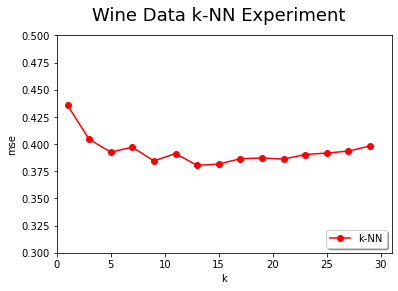

In [ ]:
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline


# explore different values of k
# explore different values of k
k_vals = range(1,31,2)
kNN_mse = []
r2_vals = []
 
for k in k_vals:
    predictions = regressions_all_kNN(test_norm_data,train_norm_data,k)
    current_accuracy = mse(test_norm_data['quality'],predictions)
    kNN_mse.append(current_accuracy)


plt.suptitle('Wine Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(k_vals,kNN_mse,'ro-',label='k-NN')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,.3,.5]) #change U shape 

plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

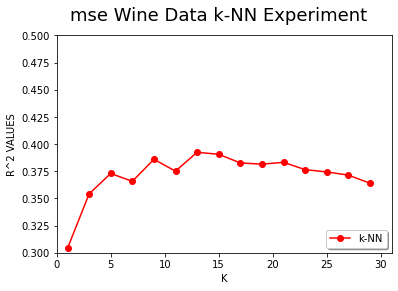

In [ ]:
# explore different values of k
# explore different values of k
k_vals = range(1,31,2)
kNN_mse = []
r2_vals = []
 
for k in k_vals:
    predictions = regressions_all_kNN(test_norm_data,train_norm_data,k)
    current_accuracy = mse(test_norm_data['quality'],predictions)
    kNN_mse.append(current_accuracy)
    r2_vals.append(sklearn.metrics.r2_score(test_norm_data['quality'],predictions))


plt.suptitle('mse Wine Data k-NN Experiment',fontsize=18)
plt.xlabel('K')
plt.ylabel('R^2 VALUES')
plt.plot(k_vals,r2_vals ,'ro-',label='k-NN')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,31,.3,.5]) 

plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

based off adjusting the numbers for the kNN algorithm the K value between 10-15 had the highest R^2 value making the data a good enough fit. When I took the MSE of the first graph i saw an elbow curve, but after implementing the r^2 function the data was more accurate. It is better because we are squaring the data values giving us a more accurate representation of the data given. 

